# <span style="font-family: Times New Roman">Table of Contents 📝</span><a class='anchor' id='top'></a>
- [Backends](#1)
- [Two Interfaces for the Price of One¶](#2)
- [Simple Line Plots](#3)
- [Aside: Matplotlib Gotchas](#4)
- [Simple Scatter Plots](#5)
- [Vertical Bar Plot](#6)
- [Horizontal Bar Plot](#7)
- [Histograms](#8)
- [Multiple Subplots](#9)
- [Arrows and Annotation](#10)
- [Saving Figures to File](#11)

# <span id="1">Backends</span>

> Backends are used for displaying Matplotlib figures on the screen.
>    - **`%matplotlib inline`** will lead to static images of your plot embedded in the notebook.
>    - **`%matplotlib notebook/widget`** will lead to interactive plots embedded within the notebook.

In [ ]:
%matplotlib inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fig = plt.figure()
plt.plot([1, 3, 5, 7, 9])

In [ ]:
%matplotlib notebook

# <span id="2">Two Interfaces for the Price of One¶
> - MATLAB-style Interface
> - Object-oriented Interface

### MATLAB-style Interface
> Matplotlib was originally written as a Python alternative for MATLAB users. The MATLAB-style tools are contained in the pyplot (plt) interface. While this stateful interface is fast and convenient for simple plots, it is easy to run into problems. For example, <span style="background:LemonChiffon"> once the second panel is created, how can we go back and add something to the first? 

In [ ]:
plt.figure()  # create a plot figure

x = np.linspace(0, 10, 100)
# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

### Object-oriented interface
> The object-oriented interface is available for these more complicated situations, in the object-oriented interface the plotting functions are methods of explicit Figure and Axes objects.

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

In [ ]:
type(ax)

# <span id="3">Simple Line Plots

> For all Matplotlib plots, we start by creating a figure and an axes. The **figure** can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. The **axes** is what we see: a bounding box with ticks and labels, which will eventually contain the plot elements that make up our visualization. In their simplest form, a figure and axes can be created as follows:

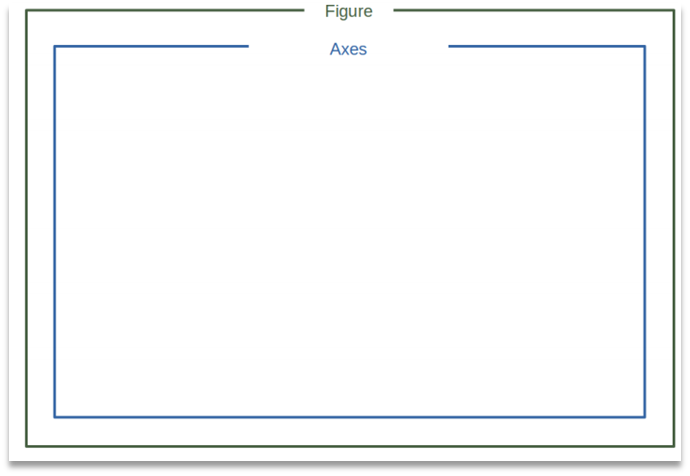

In [ ]:
fig = plt.figure()
ax = plt.axes()

In [ ]:
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x));

In [ ]:
plt.plot(x, np.sin(x)); # Matlab interface

> If we want to create a single figure with **multiple lines**, we can simply call the `plot` function multiple times:

In [ ]:
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

In [ ]:
plt.plot(x, np.sin(x), x, np.cos(x)); # Another way

In [ ]:
ax.plot(x, np.sin(x)); # object-oriented interface
ax.plot(x, np.cos(x))
fig

## Adjusting the Plot: Line Colors and Styles
> To adjust the color, you can use the `color` keyword. If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

In [ ]:
plt.plot(x, np.sin(x), color='blue')        # specify color by name
# plt.plot(x, np.cos(x), color='r')           # short color code (rgbcmyk) RGB (Red/Green/Blue) and CMYK (Cyan/Magenta/Yellow/blacK)

> The line style can be adjusted using the `linestyle` keyword:

In [ ]:
plt.plot(x, x + 4, linestyle='-')  # linestyle="solid"
plt.plot(x, x + 5, linestyle='--') # linestyle="dashed"
plt.plot(x, x + 7, linestyle=':')

> If you would like to be extremely terse, these `linestyle` and `color` codes can be combined into a single non-keyword argument to the `plt.plot()` function:

In [ ]:
# plt.plot(x, np.sin(x), '-b')  # solid blue
plt.plot(x, x + 1, '--c') # dashed cyan

## Adjusting the Plot: Axes Limits
> Matplotlib does a decent job of choosing default axes limits for your plot, but sometimes it's nice to have finer control. The most basic way to adjust axis limits is to use the **`plt.xlim()`** and **`plt.ylim()`** methods:

In [ ]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 15)
plt.ylim(-1.5, 1.5);

> A useful related method is **`plt.axis()`** <span style="background:LemonChiffon">(note here the potential confusion between axes with an e, and axis with an i).</span> **`The plt.axis()`** method allows you to set the x and y limits with a single call, by passing a list which specifies `[xmin, xmax, ymin, ymax]`:

In [ ]:
plt.plot(x, np.sin(x))
plt.axis([-1, 15, -1.5, 1.5]); # [xmin, xmax, ymin, ymax]

## Labeling Plots
> - Titles
> - Axis labels
> - simple legends

In [ ]:
plt.plot(x, np.sin(x))

plt.title("A Sine Curve", fontsize=15, color='red')
plt.xlabel("x-label", fontsize=14, color="b")
plt.ylabel("y-label", fontsize=14, color='c');

> When multiple lines are being shown within a single axes, it can be useful to create a plot legend that labels each line type. It is done via the **`plt.legend()`** method. As you can see, <span style="background:LemonChiffon">the **`plt.legend()`** function keeps track of the line style and color, and matches these with the correct label.</span> Though there are several valid ways of using this, I find it easiest to specify the label of each line using the **`label`** keyword of the **`plot`** function:

In [ ]:
plt.plot(x, np.sin(x), '-m', label='sin(x)')
plt.plot(x, np.cos(x), '--b', label='cos(x)')

plt.legend();

> Another way is to directly add the labels to **`plt.legend()`**:

In [ ]:
plt.plot(x, np.sin(x), '-r')
plt.plot(x, np.cos(x), '--b')

plt.legend(["sin(x)", "cos(x)"]);

> We can specify the location, turn off the frame, use a rounded box (fancybox) or add a shadow, or change the padding around the text:

In [ ]:
plt.plot(x, np.sin(x), '-m', label='sin(x)')
plt.plot(x, np.cos(x), '--b', label='cos(x)')

plt.legend(loc='upper left', fancybox=True, shadow=True, borderpad=1, frameon=False) #frameon

# <span id="4">Aside: Matplotlib Gotchas ✨
> While most `plt` functions translate directly to `ax` methods (such as `plt.plot()` → `ax.plot()`, `plt.legend()` → `ax.legend()`, etc.), this is not the case for all commands. In particular, functions to set limits, labels, and titles are slightly modified. <span style="background:LemonChiffon">For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:
>   - `plt.xlabel()` → `ax.set_xlabel()`
>   - `plt.ylabel()` → `ax.set_ylabel()`
>   - `plt.xlim()` → `ax.set_xlim()`
>   - `plt.ylim()` → `ax.set_ylim()`
>   - `plt.title()` → `ax.set_title()`

> In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the **`ax.set()`** method to set all these properties at once:

In [ ]:
ax = plt.axes()
ax.plot(x, np.sin(x))

ax.set(xlim=(0, 10), ylim=(-2, 2),
       xlabel='x-label', ylabel='y-label',
       title='A Simple Plot');

# <span id="5">Simple Scatter Plots
> Instead of points being joined by line segments, here the points are represented individually with a dot, circle, or other shape.
> - Scatter Plots with **`plt.plot`**
> - Scatter Plots with **`plt.scatter`**

- ### Scatter Plots with **`plt.plot`**
> The third argument in the function call is a character that represents the type of symbol used for the plotting. Just as you can specify options such as `'-'`, `'--'` to control the line style.<br><br>
>   - `':'` dotted line style.
>   - `'.'` point marker.
>   - `','` pixel marker.
>   - `'o'` circle marker.
>   - `'v'` triangle_down marker.
>   - `'^'` triangle_up marker.
>   - `'<'` triangle_left marker.
>   - `'>'` triangle_right marker.
>   - `'*'` star marker.

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'v', color='red');

> These **character codes** can be used together with **line and color codes** to plot points along with a line connecting them:

In [ ]:
plt.plot(x, y, 'oc');

> Additional keyword arguments to `plt.plot` specify a wide range of properties of the lines and markers:

In [ ]:
plt.plot(x, y, '-o', color='black',
         markersize=10, linewidth=2,
         markerfacecolor='yellow',
         markeredgecolor='blue',
         markeredgewidth=1)

- ### Scatter Plots with **`plt.scatter`**

In [ ]:
plt.scatter(x, y, marker='o', color="blue");

> - **The primary difference** of **`plt.scatter`** from **`plt.plot`** is that it can be used to <span style="background:LemonChiffon">create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.
> - For example, we might use the Iris data from Scikit-Learn, where each sample is one of three types of flowers ('setosa', 'versicolor', 'virginica') that has had the size of its petals and sepals:

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
sepal_length = iris.data[:,2]
sepal_width = iris.data[:,3]
petal_width = iris.data[:,1]

plt.scatter(sepal_length, sepal_width, alpha=0.6,
            s=100*petal_width, c=iris.target, cmap='viridis')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

In [ ]:
iris.target

In [ ]:
petal_width

In [ ]:
# for class_idx, class_name in enumerate(iris.target_names):
#     # Filter data for the current class
#     mask = (iris.target == class_idx)
#     plt.scatter(sepal_length[mask], sepal_width[mask],
#                 alpha=0.6, s=100*petal_width[mask],
#                 label=class_name)
    
# plt.legend(title="Flower Class")

In [ ]:
iris

In [ ]:
iris.data

In [ ]:
iris.target_names

In [ ]:
iris.feature_names

> We can see that this scatter plot has given us the ability to simultaneously explore different dimensions of the data:
> - The (x, y) location of each point corresponds to the sepal length and width.
> - The size of the point is related to the petal width
> - The color is related to the particular species of flower.<br>
Multicolor and multifeature scatter plots like this can be useful for both <span style="background:LemonChiffon">exploration and presentation of data

# <span id="6">Vertical Bar Plot

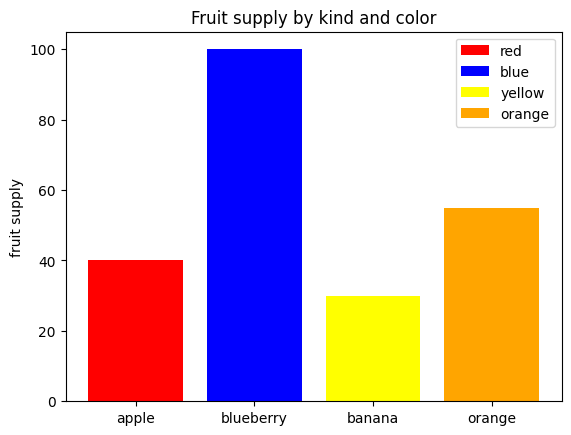

In [3]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'banana', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', 'yellow', 'orange']

ax.bar(fruits, counts, label = bar_labels, color = ["red", "blue", "yellow", "orange"])

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')

ax.legend();

# <span id="7">Horizontal Bar Plot

Text(0.5, 1.0, 'Coffee Consumption')

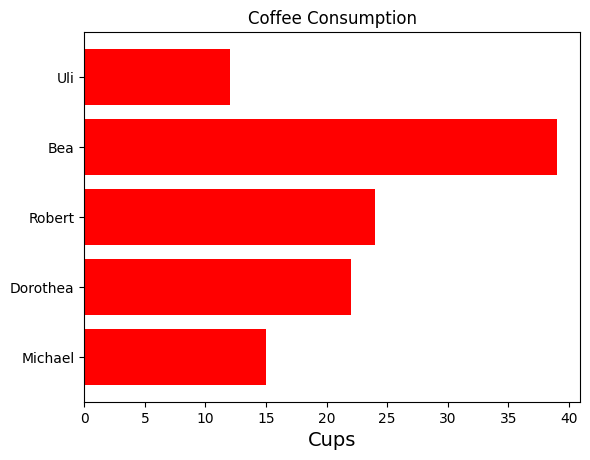

In [5]:
fig, ax = plt.subplots()

personen = ['Michael', 'Dorothea', 'Robert', 'Bea', 'Uli']
# y_pos = np.arange(len(personen))
cups = [15, 22, 24, 39, 12]

# ax.barh(y_pos, cups, color='red')
ax.barh(personen, cups, color='red')

# ax.set_yticks(y_pos, personen)

ax.set_xlabel('Cups', fontsize=14)
ax.set_title('Coffee Consumption')

# <span id="8">Histograms
>  It's a graphical representation of a frequency distribution of some numerical data. Rectangles with equal width have heights with the associated frequencies.


In [15]:
data = np.random.randint(0, 51, 100)
data

array([ 1, 46, 20, 17, 16,  2, 11, 44, 28, 36, 41, 21, 14,  5,  1, 26, 32,
       19, 19, 33, 38, 16, 41,  6, 32,  2,  7, 48, 21, 34, 50, 50, 14, 21,
       12, 49, 38, 43, 19,  2, 16,  2, 33,  7, 49, 47, 15, 16, 23, 26,  5,
       10, 14,  4, 22, 31,  8, 39, 10, 33, 40, 49,  0, 46, 12, 33, 39, 43,
       32, 24, 16, 38, 24, 34, 32, 44, 39, 21, 39,  1, 17,  8, 49,  5, 29,
       49, 15, 38,  1, 13, 30,  1,  2, 38, 16, 48,  7, 40, 23, 43])

In [17]:
data.max()

50

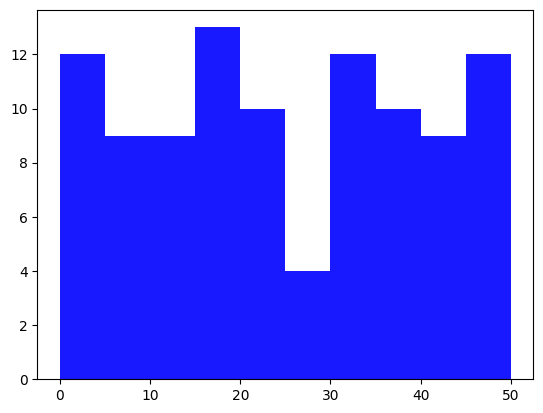

In [29]:
n, bins, patches = plt.hist(data, color="blue", alpha=0.9); # It returns a tuple of three objects # patches rep. rectangles with their properties [width, hight, xy, ..]

In [21]:
n # is an array of frequencies

array([12.,  9.,  9., 13., 10.,  4., 12., 10.,  9., 12.])

In [23]:
bins # intervals

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.])

In [25]:
bins[3] - bins[2]

5.0

In [ ]:
np.histogram(data, bins=10) # it counts the number of points in a given bin and not display it.

# <span id="9">Multiple Subplots

- ### **`plt.subplot()`** (Simple Grids of Subplots)
> Creates a single subplot within a grid. As you can see, this command takes three integer arguments—the **number of rows**, the **number of columns**, and **the index** of the plot to be created in this scheme, which runs **from the upper left to the bottom right:**

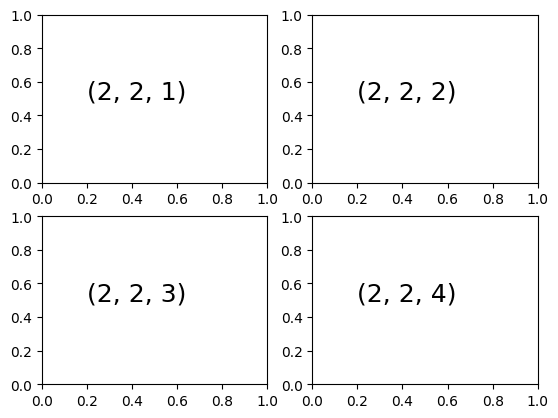

In [45]:
# plt.subplot(2, 2, 1)
# plt.subplot(2, 2, 2)
# plt.subplot(2, 2, 3)
# plt.subplot(2, 2, 4)

# using for loop
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.text(0.2, 0.5, str((2, 2, i)),
             fontsize=18, ha='left') #ha

> The command **`plt.subplots_adjust`** can be used to adjust the spacing between these plots:

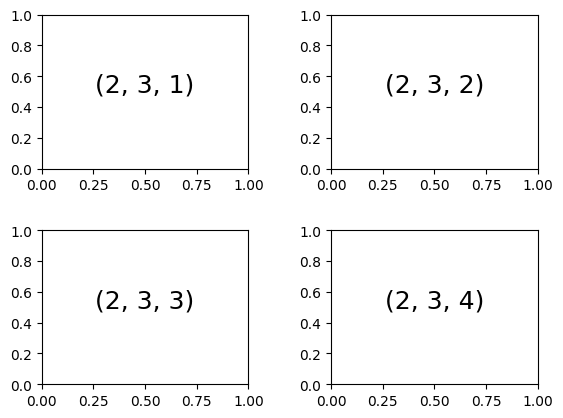

In [53]:
plt.subplots_adjust(hspace=0.4, wspace=0.4) #hight, width
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

- ### **`plt.subplots()`**
> The previous approach is not that good with a large grid with subplots. Rather than creating a single subplot, this function creates a <span style="background:LemonChiffon">full grid of subplots in a single line, returning them in a NumPy array. The arguments are the number of rows and number of columns, along with optional keywords `sharex` and `sharey`.

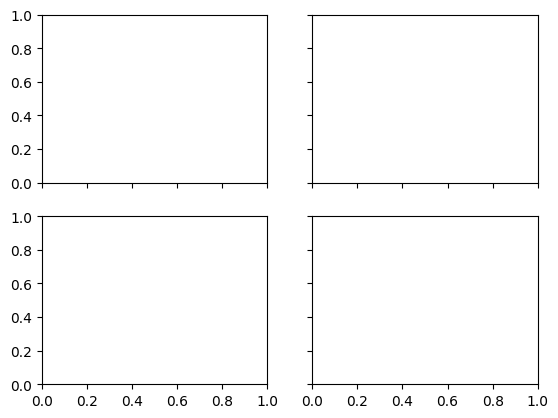

In [69]:
fig, ax = plt.subplots(2, 2, sharex="col", sharey="row") # This function returns a figure and an Axes object or an array of Axes objects.
                                                         # sharex=col means that share the x with the plots that on the same columns
                                                         # sharey=row means that share the y with the plots that on the same rows

In [61]:
ax # Numpy array

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

> The resulting grid of axes instances is returned within a NumPy array, allowing for convenient specification of the desired axes <span style="background:LemonChiffon">using standard array indexing notation:

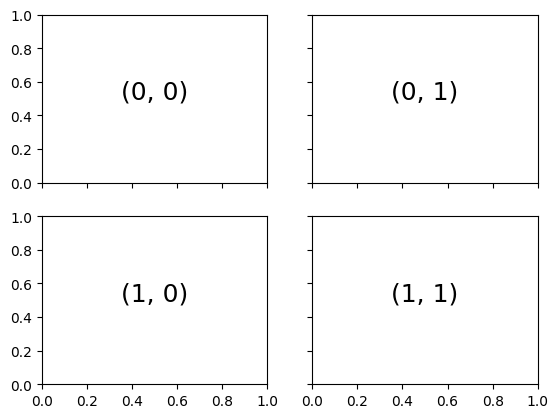

In [71]:
for row in range(2):
    for col in range(2):
        ax[row, col].text(0.5, 0.5, str((row, col)),
                      fontsize=18, ha='center') # ha --> horizontalalignment
fig

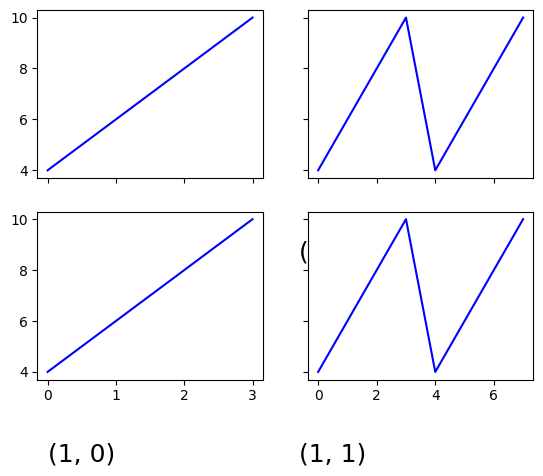

In [73]:
y = [4, 6, 8, 10]
for row in range(2):
    for col in range(2):
        ax[row, col].plot(y*(col+1), color="b")
fig

Text(0, 0.5, 'y-label Plot (1)')

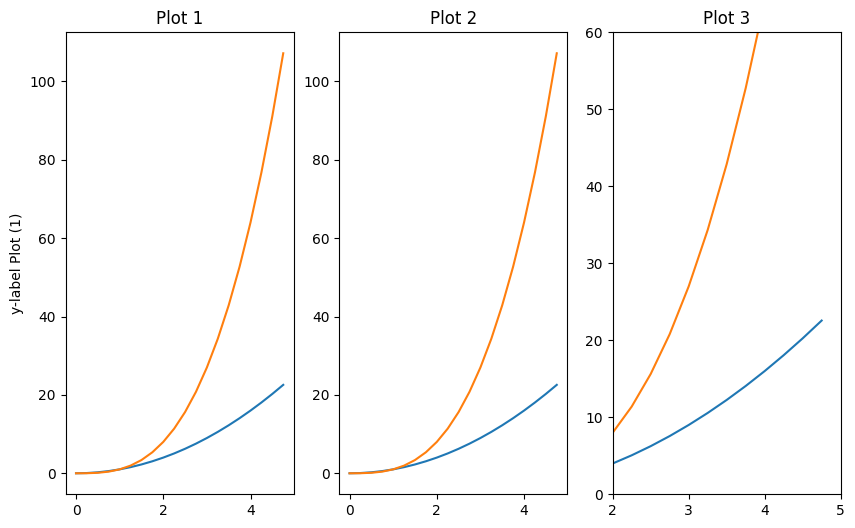

In [79]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))
x = np.arange(0, 5, 0.25)

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("Plot 1")

axes[1].plot(x, x**2, x, x**3)
axes[1].set_title("Plot 2")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("Plot 3")

axes[0].set_ylabel("y-label Plot (1)")
# axes[0].set_xlabel("x-label Plot (1)")

In [77]:
axes

array([<Axes: title={'center': 'Plot 1'}>,
       <Axes: title={'center': 'Plot 2'}>,
       <Axes: title={'center': 'Plot 3'}>], dtype=object)

# <span id="11">Saving Figures to File
> One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the `savefig()` command. For example, to save the previous figure as a PNG file, you can run this:

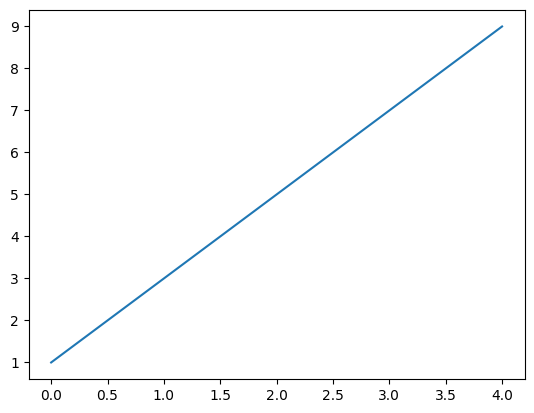

In [81]:
fig = plt.figure()
plt.plot([1, 3, 5, 7, 9])

In [83]:
fig.savefig('my_figure.png') # the file format is inferred from the extension of the given filename

In [85]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

## Resources 📚
> - Python Data Science Handbook by Jake VanderPlas.

**`plt.style.use()`**: Use Matplotlib style settings from a style specification. To use a style sheet for the plots. Look to the link below to check the available style sheets: <br>
https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html